<a href="https://colab.research.google.com/github/gredy/2021Z-DataVisualizationTechniques/blob/master/kaggleGG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Machine Learning for Data Science - IDC6210

Mini-Kaggle Project 1: Breast Cancer Classification

Gabriel Gonzalez


General Code to Load the data and Check for missing values.

In [ ]:
import pandas as pd
from sklearn import datasets
import numpy as np
import pandas as pd

import sys
sys.path.insert(0, '..')


# Checking directory (working on Jupyter local)
import os
print(os.getcwd())


#USING THIS IN JUPYTER LOCALLLY TO LOAD THE FILE
# Load CSV file
def load_csv(file_path):
    try:
        dataset = pd.read_csv(file_path)
        return dataset
    except Exception as e:
        print(f"Error loading CSV file: {e}")

train_data = load_csv('train.csv')
test_data = load_csv('test.csv')
#print(train_data.head())

#USE IN KAGGLE TO LOAD THE DATA (CHECK LOCAL DIRECTORY)
#train_data = pd.read_csv('/kaggle/input/dataset3/train.csv')
#test_data = pd.read_csv('/kaggle/input/dataset3/test.csv')


# Check missing values
#missing_values = train_data.isnull().sum()
#print(missing_values)



C:\Users\Gabriel Gonzalez\Documents\Personal\Master\Machine Learning\machine-learning-book-main\ch03


Splitting and Scaling the Data

In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

#Split the training dataset
X = train_data.drop('label', axis=1)
y = train_data['label']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.25,
    random_state=1,
    stratify=y
)

# Scaling
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
test_data_std = sc.transform(test_data)

Perceptron Model

In [ ]:
from sklearn.linear_model import Perceptron
#Traing the perceptron Model
ppn = Perceptron(eta0=0.1, random_state=1)
ppn.fit(X_train_std, y_train)

# Make predictions
y_pred = ppn.predict(X_test_std)
y_pred_testdata = ppn.predict(test_data_std)

# Accuracy
accuracy_perceptron = accuracy_score(y_test, y_pred)
print(f"Perceptron Accuracy: {accuracy_perceptron:.5f}")

#Saving to a File
predictions_testdata = pd.DataFrame({'id':test_data['id'], 'label': y_pred_testdata})
predictions_testdata.reset_index(drop=True)
predictions_testdata.to_csv('submission_perceotron.csv', index=False)

Perceptron Accuracy: 0.98246


LOGISTIC REGRESSION

In [ ]:
from sklearn.linear_model import LogisticRegression

# Train a Logistic Regression model
lr = LogisticRegression(C=100.0, solver='lbfgs', multi_class='ovr')
lr.fit(X_train_std, y_train)

# Make predictions
y_pred = lr.predict(X_test_std)
y_pred_testdata = lr.predict(test_data_std)

# Accuracy
accuracy_LR = accuracy_score(y_test, y_pred)
print(f"LR Accuracy: {accuracy_LR:.5f}")

#Saving to a File
predictions_testdata = pd.DataFrame({'id': test_data['id'], 'label': y_pred_testdata})
predictions_testdata.to_csv('submission_logistic_regression.csv', index=False)

LR Accuracy: 0.93860


C:\Users\Gabriel Gonzalez\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


SVM

In [ ]:
from sklearn.svm import SVC

#Train SVM Model
svm = SVC(kernel='linear', C=1.0, random_state=1)
svm.fit(X_train_std, y_train)

# Make predictions
y_pred = svm.predict(X_test_std)
y_pred_testdata = svm.predict(test_data_std)

# Accuracy
accuracy_SVM = accuracy_score(y_test, y_pred)
print(f"SVM Accuracy: {accuracy_SVM:.5f}")

#Saving to a File
predictions_testdata.to_csv('submission_svm.csv', index=False)

SVM Accuracy: 0.96491


DECISION TREE

Decision Tree Accuracy: 0.93860


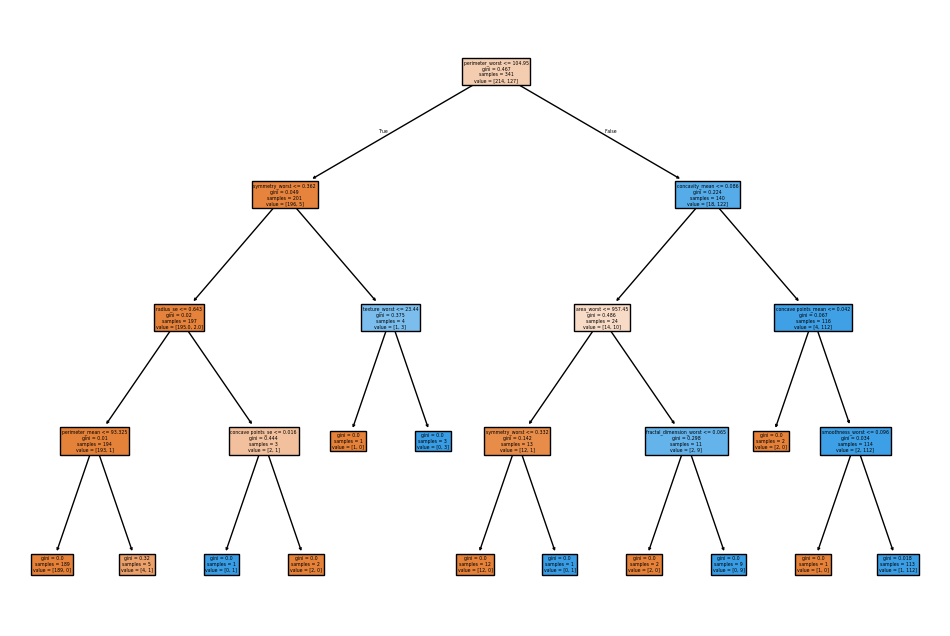

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt

# Train the Decision Tree model
tree_model = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=1)
tree_model.fit(X_train, y_train)

# Make predictions
y_pred = tree_model.predict(X_test)
y_pred_testdata = tree_model.predict(test_data)

# Accuracy
accuracy_DT = accuracy_score(y_test, y_pred)
print(f"Decision Tree Accuracy: {accuracy_DT:.5f}")

#Saving to a File
predictions_testdata = pd.DataFrame({'id': test_data['id'], 'label': y_pred_testdata})
predictions_testdata.to_csv('submission_decision_tree.csv', index=False)

# Plot the decision tree
feature_names = X.columns.tolist()
plt.figure(figsize=(12, 8))
tree.plot_tree(tree_model, feature_names=feature_names, filled=True)
plt.show()


KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Train a KNN model
knn = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')
knn.fit(X_train_std, y_train)

# Make predictions
y_pred = knn.predict(X_test_std)
y_pred_testdata = knn.predict(test_data_std)

# Accuracy
accuracy_KNN = accuracy_score(y_test, y_pred)
print(f"KNN Accuracy: {accuracy_KNN:.5f}")

#Saving to a File
predictions_testdata = pd.DataFrame({'id': test_data['id'], 'label': y_pred_testdata})
predictions_testdata.to_csv('submission_knn.csv', index=False)

KNN Accuracy: 0.99123


Random Forrest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Train a Random Forest model
forest = RandomForestClassifier(n_estimators=30, random_state=1, n_jobs=3)
forest.fit(X_train_std, y_train)

# Make predictions
y_pred = forest.predict(X_test_std)
y_pred_testdata = forest.predict(test_data_std)

# Accuracy
accuracy_RF = accuracy_score(y_test, y_pred)
print(f"RF Accuracy: {accuracy_KNN:.5f}")

#Saving to a File
predictions_testdata = pd.DataFrame({'id': test_data['id'], 'label': y_pred_testdata})
predictions_testdata.to_csv('submission_random_forest.csv', index=False)

RF Accuracy: 0.99123



As summary we obtained the following accuracy numbers calculated with the training data for each model:

Perceptron Accuracy: 0.98246

Logistic Regression Accuracy: 0.93860

SVM Accuracy: 0.96491

Decision Tree Accuracy: 0.93860

KNN Accuracy: 0.99123

Random Forrest Accuracy: 0.99123


But obtained the following scores in Kaggle with the test data:

Perceptron: 0.98245

Logistic Regression Accuracy: 0.97368

SVM Accuracy: 0.98245

Decision Tree Accuracy: 0.90350

KNN Accuracy: 0.94736

Random Forrest Accuracy: 0.96491


Take aways:

- Perceptron and SVM models achieved the highest accuracy score of 0.98245 on the test set, being the best performers.
- Some models performed better on the training set than on the test set suggests that they may be overfitting the training data.
- Since Perceptron and SVM performed well on this dataset suggests that the data may be linearly separable.
